In [2]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample.csv


In [6]:
import pandas as pd

# Try reading the file with a different encoding
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Preview the first few rows
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

In [8]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [9]:
# Check data structure
df.info()

# See missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [10]:
total_sales = df['SALES'].sum()
print("💰 Total Sales: $", round(total_sales, 2))


💰 Total Sales: $ 10032628.85


/tmp/ipython-input-13-96329992.py:16: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


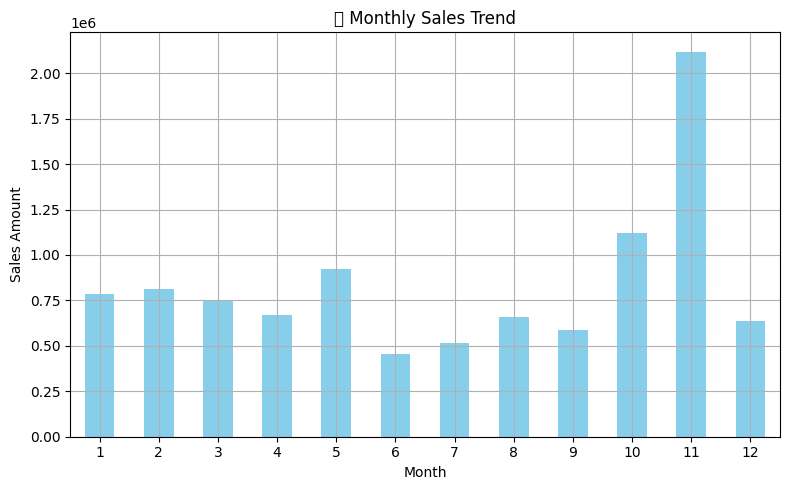

In [13]:
import matplotlib.pyplot as plt

# Add a month column from ORDERDATE (if not already created)
df['MONTH'] = df['ORDERDATE'].dt.month

# Group and plot
monthly_sales = df.groupby('MONTH')['SALES'].sum()

plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('📅 Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

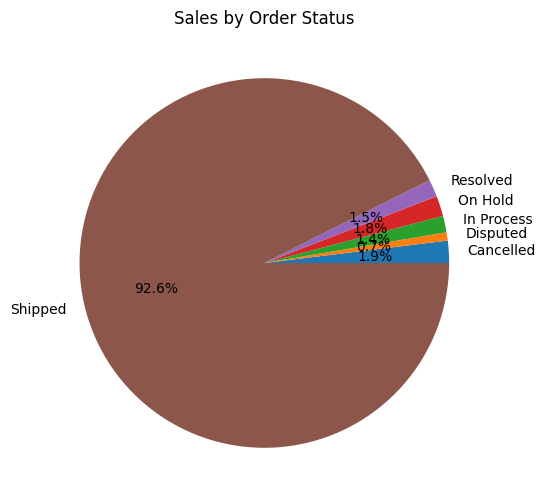

In [15]:
status_sales = df.groupby('STATUS')['SALES'].sum()
status_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Sales by Order Status')
plt.ylabel('')
plt.show()

/tmp/ipython-input-16-3774466116.py:8: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


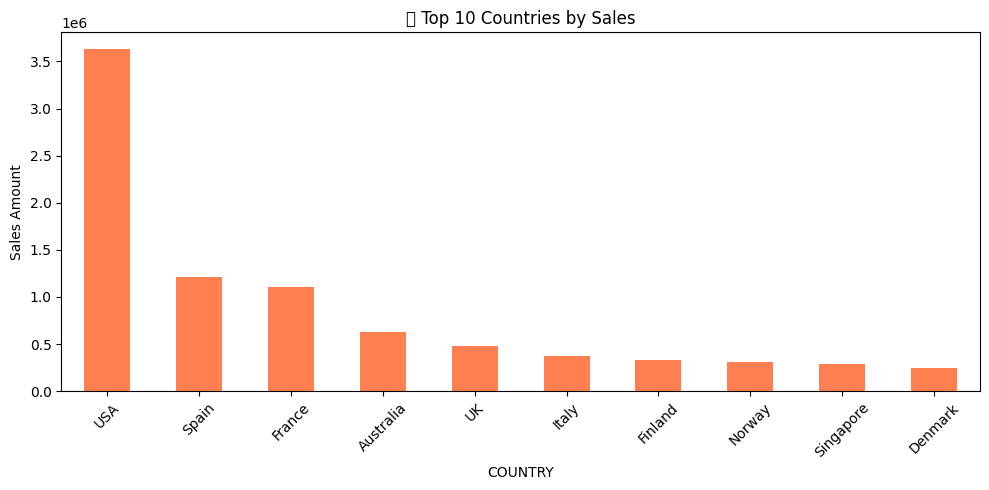

In [16]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
country_sales.plot(kind='bar', color='coral')
plt.title('🌍 Top 10 Countries by Sales')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()